# STATISTICS PROJECT

In [1]:
import pandas as pd      
import numpy as np 
import warnings
import seaborn as sns
from scipy import stats

In [4]:
df=pd.read_csv("my_data.csv")

In [5]:
df.head()

,age,hp_kW,km,Gearing_Type,Gears,body_type,make_model,Fuel,Drive_chain,Weight_kg,Paint_Type,Upholstery_type,cons_comb,price
0,3.0,66.0,56013.0,Automatic,7.0,Sedans,Audi A1,Diesel,front,1220.0,Metallic,Cloth,3.8,25232.0
1,2.0,141.0,80000.0,Automatic,7.0,Sedans,Audi A1,Benzine,front,1255.0,Metallic,Cloth,5.6,23200.0
2,3.0,85.0,83450.0,Automatic,7.0,Sedans,Audi A1,Diesel,front,1135.0,Metallic,Cloth,3.8,23424.0
3,3.0,66.0,73000.0,Automatic,6.0,Sedans,Audi A1,Diesel,front,1195.0,Metallic,Cloth,3.8,23200.0
4,3.0,66.0,16200.0,Automatic,7.0,Sedans,Audi A1,Diesel,front,1135.0,Metallic,Cloth,4.1,26864.0


In [6]:
df.shape

(15915, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              15915 non-null  float64
 1   hp_kW            15915 non-null  float64
 2   km               15915 non-null  float64
 3   Gearing_Type     15915 non-null  object 
 4   Gears            15915 non-null  float64
 5   body_type        15915 non-null  object 
 6   make_model       15915 non-null  object 
 7   Fuel             15915 non-null  object 
 8   Drive_chain      15915 non-null  object 
 9   Weight_kg        15915 non-null  float64
 10  Paint_Type       15915 non-null  object 
 11  Upholstery_type  15915 non-null  object 
 12  cons_comb        15915 non-null  float64
 13  price            15915 non-null  float64
dtypes: float64(7), object(7)
memory usage: 1.7+ MB


In [8]:
df.describe()

,age,hp_kW,km,Gears,Weight_kg,cons_comb,price
count,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000
mean,1.389695,88.499340,32089.995708,5.937355,1337.700534,4.832124,28839.008935
std,1.121306,26.674341,36977.214964,0.704772,199.682385,0.867530,11810.686908
min,0.000000,40.000000,0.000000,5.000000,840.000000,3.000000,7920.000000
25%,0.000000,66.000000,1920.500000,5.000000,1165.000000,4.100000,20560.000000
50%,1.000000,85.000000,20413.000000,6.000000,1295.000000,4.800000,27040.000000
75%,2.000000,103.000000,46900.000000,6.000000,1472.000000,5.400000,35040.000000
max,3.000000,294.000000,317000.000000,8.000000,2471.000000,9.100000,119360.000000


In [9]:
def nunique_in_columns(df):
    for i in df.columns:
        print(i, ":", df[i].nunique())

In [10]:
nunique_in_columns(df)

age : 4
hp_kW : 77
km : 6691
Gearing_Type : 3
Gears : 4
body_type : 8
make_model : 9
Fuel : 4
Drive_chain : 3
Weight_kg : 432
Paint_Type : 3
Upholstery_type : 2
cons_comb : 62
price : 2952


In [12]:
def unique_in_columns(df):
    for i in df.columns:
        print(i, ":", df[i].unique()) if df[i].nunique()<10 else print(i, ":", "mean = ", df[i].mean(), "min =", df[i].min(), "max =", df[i].max())

In [13]:
unique_in_columns(df)

age : [3. 2. 1. 0.]
hp_kW : mean =  88.49934024505184 min = 40.0 max = 294.0
km : mean =  32089.995707760947 min = 0.0 max = 317000.0
Gearing_Type : ['Automatic' 'Manual' 'Semi-automatic']
Gears : [7. 6. 5. 8.]
body_type : ['Sedans' 'Station wagon' 'Compact' 'Coupe' 'Van' 'Off-Road' 'Convertible'
 'Transporter']
make_model : ['Audi A1' 'Audi A2' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Duster' 'Renault Espace']
Fuel : ['Diesel' 'Benzine' 'LPG/CNG' 'Electric']
Drive_chain : ['front' '4WD' 'rear']
Weight_kg : mean =  1337.700534087339 min = 840.0 max = 2471.0
Paint_Type : ['Metallic' 'Uni/basic' 'Perl effect']
Upholstery_type : ['Cloth' 'Part/Full Leather']
cons_comb : mean =  4.832123782595015 min = 3.0 max = 9.1
price : mean =  28839.008934966696 min = 7920.0 max = 119360.0


# HYPOTHEIS TESTS (alpha = 0.05)

## 1. One Sample T Test

### Let's test if the the avg combined fuel consumption for Benzine-Compact-A3 cars is equal to 4.8 or greater

In [14]:
audi_a3_benz = df[(df["make_model"]=='Audi A3') & (df["Fuel"]=='Benzine') & (df["body_type"]=='Compact')]
audi_a3_benz.head(10)

,age,hp_kW,km,Gearing_Type,Gears,body_type,make_model,Fuel,Drive_chain,Weight_kg,Paint_Type,Upholstery_type,cons_comb,price
2673,3.0,92.0,56993.0,Automatic,7.0,Compact,Audi A3,Benzine,front,1205.0,Metallic,Part/Full Leather,5.1,29472.0
2688,3.0,82.0,39660.0,Automatic,7.0,Compact,Audi A3,Benzine,front,1280.0,Metallic,Part/Full Leather,4.1,29592.0
2704,3.0,110.0,31900.0,Automatic,7.0,Compact,Audi A3,Benzine,front,1195.0,Metallic,Cloth,4.7,28784.0
2766,3.0,112.0,75201.0,Automatic,7.0,Compact,Audi A3,Benzine,front,1280.0,Metallic,Cloth,4.1,28630.4
2827,2.0,85.0,36700.0,Automatic,7.0,Compact,Audi A3,Benzine,front,1225.0,Metallic,Cloth,4.5,27184.0
2836,3.0,92.0,124136.0,Automatic,7.0,Compact,Audi A3,Benzine,front,1300.0,Metallic,Cloth,4.9,27040.0
2885,3.0,81.0,123748.0,Automatic,7.0,Compact,Audi A3,Benzine,front,1255.0,Metallic,Cloth,4.1,26240.0
2974,3.0,92.0,113490.0,Automatic,7.0,Compact,Audi A3,Benzine,front,1300.0,Metallic,Cloth,5.0,22320.0
2975,3.0,92.0,118032.0,Automatic,7.0,Compact,Audi A3,Benzine,front,1300.0,Metallic,Cloth,5.0,22320.0
2978,3.0,92.0,121510.0,Automatic,7.0,Compact,Audi A3,Benzine,front,1300.0,Metallic,Cloth,5.0,22320.0


In [15]:
audi_a3_benz.shape

(71, 14)

In [16]:
audi_a3_benz.cons_comb.mean()

4.926760563380281

H0: mu = 4.8

H1: mu > 4.8

In [50]:
oneSamp = stats.ttest_1samp(audi_a3_benz.cons_comb, 4.8, alternative='greater')
oneSamp

Ttest_1sampResult(statistic=2.0878997259529606, pvalue=0.020223637341941162)

In [ ]:
#help(stats.ttest_1samp)

In [18]:
alpha = 0.05

if oneSamp.pvalue < alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print("At {} level of significance, we fail to reject the null hypothesis. We don't have strong evidence to reject the null hypothesis. We can not say fuel consumption is equal to 4.8".format(alpha))

At 0.05 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


In [21]:
# Peki kac
stats.t.interval(alpha = 0.95, df=audi_a3_benz.cons_comb.shape[0]-1, loc=audi_a3_benz.cons_comb.mean(), scale=audi_a3_benz.cons_comb.sem())

(4.80567430204495, 5.047846824715612)

## 2. Independent Sample T Test

### Determine if there is any difference in mean fuel consumption between Automatic and Manual gearing types for Diesel-Compact-A3. 

H0: mu1 = mu2

H1: mu1 != mu2

In [22]:
audi_a3_diesel=df[(df["make_model"]=='Audi A3') & (df["Fuel"]=='Diesel') & (df["body_type"]=='Compact')]
audi_a3_diesel.head()

,age,hp_kW,km,Gearing_Type,Gears,body_type,make_model,Fuel,Drive_chain,Weight_kg,Paint_Type,Upholstery_type,cons_comb,price
2620,3.0,81.0,35000.0,Automatic,7.0,Compact,Audi A3,Diesel,front,1355.0,Metallic,Part/Full Leather,3.0,27040.0
2654,2.0,81.0,30529.0,Automatic,7.0,Compact,Audi A3,Diesel,front,1285.0,Metallic,Part/Full Leather,3.8,28800.0
2667,3.0,81.0,40000.0,Automatic,7.0,Compact,Audi A3,Diesel,front,1330.0,Uni/basic,Cloth,3.8,29600.0
2669,3.0,81.0,66045.0,Automatic,7.0,Compact,Audi A3,Diesel,front,1255.0,Metallic,Cloth,4.0,29520.0
2671,3.0,82.0,122381.0,Automatic,7.0,Compact,Audi A3,Diesel,front,1260.0,Metallic,Cloth,3.8,29520.0


In [23]:
audi_a3_diesel.Gearing_Type.value_counts()

Automatic    60
Manual       50
Name: Gearing_Type, dtype: int64

In [24]:
manual_cars = audi_a3_diesel[audi_a3_diesel["Gearing_Type"]=="Manual"]
automatic_cars = audi_a3_diesel[audi_a3_diesel["Gearing_Type"]=="Automatic"]

In [25]:
manual_cars.cons_comb.mean()

3.919999999999999

In [26]:
automatic_cars.cons_comb.mean()

3.886666666666668

In [27]:
#Perform Levene test for equal variances
#H0: The population variances are equal
#H1: There is a difference between the variances in the population
#The small p-value suggests that the populations do not have equal variances.
#The large p-value suggests that the populations have equal variances.
leveneTest = stats.levene(manual_cars.cons_comb, automatic_cars.cons_comb)
leveneTest

LeveneResult(statistic=0.4763372576826049, pvalue=0.4915665786254162)

In [28]:
# Calculate test statistics using stats.ttest_ind()
# Calculate test statistics using stats.ttest_ind()
indTest = stats.ttest_ind(manual_cars.cons_comb, automatic_cars.cons_comb, equal_var = True)
indTest

Ttest_indResult(statistic=0.6020423811725586, pvalue=0.5484077757125068)

In [29]:
if indTest.pvalue < alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis. Avg fuel consumption for automatic and manual cars are not the same.'.format(alpha))
else:
    print("At {} level of significance, we fail to reject the null hypothesis. We don't have strong evidence to reject the null hypothesis. There is no significant difference between manual and automatic cars regarding fuel consumption.".format(alpha))

At 0.05 level of significance, we fail to reject the null hypothesis. We don't have strong evidence to reject the null hypothesis. There is no significant difference between manual and automatic cars regarding fuel consumption.


## 3. One Way ANOVA

### Determine if there is any difference in price among sedan, st_wagon and compact diesel-automatic-clio cars. 

In [30]:
from scipy.stats import f_oneway

In [31]:
diesel_auto_clio = df[(df["make_model"]=='Renault Clio') & (df["Gearing_Type"]=='Automatic') & (df["Fuel"]=='Diesel')]
diesel_auto_clio.body_type.value_counts()

Sedans           96
Station wagon    56
Compact          20
Name: body_type, dtype: int64

In [32]:
sedan = diesel_auto_clio[diesel_auto_clio["body_type"]=="Sedans"]
st_wagon = diesel_auto_clio[diesel_auto_clio["body_type"]=="Station wagon"]
compact = diesel_auto_clio[diesel_auto_clio["body_type"]=="Compact"]

In [33]:
# shapiro for normality test
# large p value suggests normal data distribution
# small p value suggests not normal data distribution
stats.shapiro(compact.price)

ShapiroResult(statistic=0.9690704345703125, pvalue=0.7351323962211609)

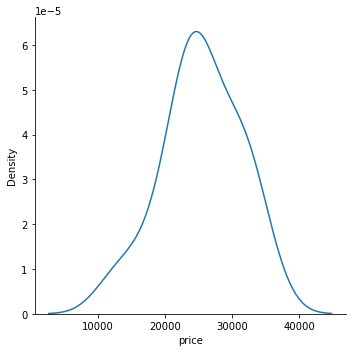

In [34]:
sns.displot(x="price", kind="kde", data=compact);

H0: mu1 = mu2 = mu3 = m4

H1: At least one of the mus is different.

In [35]:
from scipy.stats import f_oneway
anova_test = f_oneway(sedan.price, st_wagon.price, compact.price)
anova_test

F_onewayResult(statistic=5.181927261831546, pvalue=0.006543725850937714)

In [36]:
alpha = 0.05
if anova_test.pvalue < alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis. '.format(alpha))
else:
    print("At {} level of significance, we fail to reject the null hypothesis. We don't have strong evidence to reject the null hypothesis.".format(alpha))

At 0.05 level of significance, we can reject the null hypothesis in favor of alternative hypothesis. 


In [ ]:
# At least one of the means is signicantly different. To make multiple comparisons we need to implement posthoc test (tukeyhsd is one of the posthoc tests)

In [38]:
import statsmodels.api as sm

In [39]:
print(sm.stats.multicomp.pairwise_tukeyhsd (diesel_auto_clio.price, diesel_auto_clio.body_type))

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1     group2     meandiff  p-adj    lower      upper   reject
-------------------------------------------------------------------
Compact        Sedans   -3559.21 0.0062 -6266.8192 -851.6008   True
Compact Station wagon -3580.9886 0.0101  -6450.483 -711.4941   True
 Sedans Station wagon   -21.7786 0.9996 -1874.0293 1830.4721  False
-------------------------------------------------------------------


In [ ]:
# compare : compact&Sedan  : Significant difference appears. (p-adj is too small)
# compare : compact&station wagon  : Significant difference appears. (p-adj is too small)
# compare : sedan&station wagon  : No significant difference appears. (p-adj is too large)

## 4. Chi Square Test

In [41]:
from scipy.stats import chi2_contingency

H0: There is no associatoion between two categorical variables (Gearing Type - Fuel categories)

H1: There a is significant associatoion between two categorical variables

In [42]:
df_fuel = df[(df["Fuel"]=="Benzine") | (df["Fuel"]=="Diesel") | (df["Fuel"]=="LPG/CNG")]

In [45]:
contigency_table= pd.crosstab(df_fuel['Gearing_Type'], df_fuel['Fuel'])
contigency_table

Fuel,Benzine,Diesel,LPG/CNG
Gearing_Type,,,
Automatic,3933,3347,16
Manual,4457,3663,29
Semi-automatic,158,288,19


In [47]:
chi2, p, dof, expected = chi2_contingency(contigency_table)

In [49]:
print('stat=%.3f, p=%.3f' % (chi2, p))
if p > 0.05:
	print('Probably gearing type and feul categories are independent')
else:
	print('Reject Ho. There a is significant associatoion between two categorical variables. Gearing type and feul categories dependent.')

stat=226.255, p=0.000
Reject Ho. There a is significant associatoion between two categorical variables. Gearing type and feul categories dependent.
